# Uso de Ensembles

Disciplina: Métodos e Modelos Avançados em Ciência de Dados

Especialização em Ciência de Dados - Universidade Tecnologica Federal do Paraná

**Aula 06:** Ensembles

**Exemplo 02:** Executando diferentes métodos de ensemble no dataset wine

by: Rafael G. Mantovani

---

In [ ]:
import pandas as pd               # manipulação de data frames no python
import numpy as np                # manipulação de numeros na notação científica
import matplotlib.pyplot as plt   # plots/gráficos

In [ ]:
# import dos datasets ja existentes no scikit-learn (iris)
from sklearn import datasets

# import das classes dos algoritmos de classificação
from sklearn.tree import DecisionTreeClassifier     # Arvore de decisao
from sklearn.neural_network import MLPClassifier    # MLP
from sklearn.neighbors import KNeighborsClassifier  #k-NN

# import das classes dos algoritmos de ensemble
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

# import das metodologias de experientação
from sklearn.model_selection import train_test_split # holdout
from sklearn.metrics import accuracy_score           # acurácia

In [ ]:
# seed para reprodução dos experimentos
seed = 10
#seed = 42

In [ ]:
# carregar dataset wine
wine = datasets.load_wine()
# criar um data frame para visualização
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Vendo o dataset com a coluna da classe (target)
Y = pd.DataFrame(wine.target)
full_df = df.join(Y)
full_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


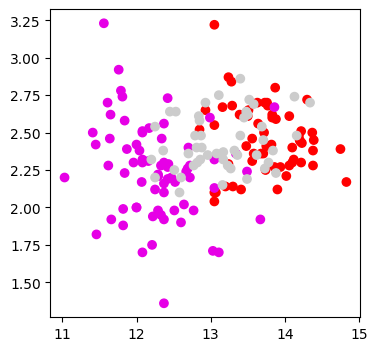

In [ ]:
# Nesse exemplo/tutorial, iremos apenas usar duas features do dataset
# assim, conseguimos gerar as superfícies de decisão e plotar em 2 dimensões

# selecionando as colunas 1 e 3
# alcohol e ash
X = df.iloc[:, [0,2]]

# cores customizadas para o plot
color_map_samples = {0: (1, 0, 0), 1: (.9, 0, .9), 2: (.8, .8, .8)}
colors = [color_map_samples[c] for c in Y.values.ravel()]

# scatter plot - vendo nosso problema em 2 dimensões
plt.figure(figsize=(4, 4))
plt.scatter( X.values[:,0],  X.values[:,1], c = colors)
plt.show()

In [ ]:
# Separar os conjuntos de treino e teste
# - usaremos holdout
# - 2/3 dos exemplos compõem o conjunto de treinamento
# - 1/3 dos exemplos compõem o conjunto de teste
# a amostragem é estratificada (stratify)

[X_train, X_test, y_train, y_test] = train_test_split(X, Y, test_size=0.34, stratify=Y, random_state=seed)
print("*** Dimensões dos conjuntos de dados ***")
print("- (X_train) Conjunto de treinamento:\t\t", X_train.shape)
print("- (y_train) Rótulos do conjunto de treinamento:\t", y_train.shape)
print("- (X_test) Conjunto de teste:\t\t\t", X_test.shape)
print("- (y_test) Rótulos do conjunto de teste:\t",y_test.shape)

*** Dimensões dos conjuntos de dados ***
- (X_train) Conjunto de treinamento:		 (117, 2)
- (y_train) Rótulos do conjunto de treinamento:	 (117, 1)
- (X_test) Conjunto de teste:			 (61, 2)
- (y_test) Rótulos do conjunto de teste:	 (61, 1)


In [ ]:
# Função para plotar a superfície de decisão de um classificador
# O código é baseado de:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

def plot_decision_boundary(classifier, X, y, title):
  xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05
  ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05
  step = 0.01

  xx, yy = np.meshgrid(np.arange(xmin, xmax, step), np.arange(ymin, ymax, step))

  Z = classifier.predict(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
  Z = Z.reshape(xx.shape)

  #colormap = plt.cm.Paired
  colormap = plt.cm.Set1
  plt.contourf(xx, yy, Z, cmap=colormap)

  #color_map_samples = {0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}
  color_map_samples = {0: (1, 0, 0), 1: (.9, 0, .9), 2: (.8, .8, .8)}
  colors = [color_map_samples[c] for c in y]
  plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

  plt.title(title)

In [ ]:
# Convertendo os conjuntos de dados do formato do pandas para numpy array (facilitar os plots)
y_train_values = y_train.values.ravel().astype(int)
x_train_values = X_train.values

In [ ]:
# Induzindo uma Árvore de Decisão (Decision Tree)
tree = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=3, random_state=seed)
tree.fit(X_train, y_train_values)

# Induzindo uma Árvore uma MLP (Multilayer Perceptron)
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=seed)
mlp.fit(X_train, y_train_values)

# Induzindo um kNN (k Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train_values)

# Induzindo um ensemble (Voting) composto pelos três modelos induzidos acima
voting_clf = VotingClassifier(estimators=[('Tree', tree), ('MLP', mlp), ('kNN', knn)], voting='hard')
voting_clf.fit(X_train, y_train_values)

VotingClassifier(estimators=[('Tree',
                              DecisionTreeClassifier(min_samples_leaf=3,
                                                     min_samples_split=5,
                                                     random_state=10)),
                             ('MLP',
                              MLPClassifier(hidden_layer_sizes=(10,),
                                            max_iter=10000, random_state=10)),
                             ('kNN', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
# Induzindo um ensemble (Bagging)
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=50, random_state=seed)
bagging_clf.fit(x_train_values, y_train_values)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=3,
                                                        min_samples_split=5,
                                                        random_state=10),
                  n_estimators=50, random_state=10)

In [ ]:
# Induzindo um ensemble (Boosting)
boosting_clf = AdaBoostClassifier(n_estimators=50,random_state=seed)
boosting_clf.fit(x_train_values, y_train_values)

AdaBoostClassifier(random_state=10)

In [ ]:
# Induzindo um ensemble (Random Forest)
random_forest_clf = RandomForestClassifier(n_estimators=50, random_state=seed)
random_forest_clf.fit(x_train_values, y_train_values)

RandomForestClassifier(n_estimators=50, random_state=10)

In [ ]:
# Obtendo as predições da DT para o conjunto de teste e mensurando a acurácia
y_test_pred_tree = tree.predict(X_test)
tree_acc = accuracy_score(y_test.values, y_test_pred_tree)

# .. o mesmo para MLP
y_test_pred_mlp = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test.values, y_test_pred_mlp)

# .. o mesmo para kNN
y_test_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test.values, y_test_pred_knn)

# .. o mesmo para Voting
y_test_pred_voting = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test.values, y_test_pred_voting)

# .. o mesmo para Bagging
y_test_pred_bagging = bagging_clf.predict(X_test)
bagging_acc = accuracy_score(y_test.values, y_test_pred_bagging)

# .. o mesmo para Boosting
y_test_pred_boosting = boosting_clf.predict(X_test)
boosting_acc = accuracy_score(y_test.values, y_test_pred_boosting)

# .. o mesmo para Random Forest
y_test_pred_rf = random_forest_clf.predict(X_test)
rf_acc = accuracy_score(y_test.values, y_test_pred_rf)

print("*** Desempenho dos algoritmos *** ")
print("DT = \t ", round(tree_acc, 3))
print("MLP = \t ", round(mlp_acc, 3))
print("kNN = \t ", round(knn_acc, 3))
print("Voting = ", round(voting_acc, 3))
print("Bagging =", round(bagging_acc, 3))
print("Boosting=", round(boosting_acc, 3))
print("RF = \t ",  round(rf_acc, 3))

*** Desempenho dos algoritmos *** 
DT = 	  0.557
MLP = 	  0.377
kNN = 	  0.623
Voting =  0.574
Bagging = 0.705
Boosting= 0.689
RF = 	  0.623


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

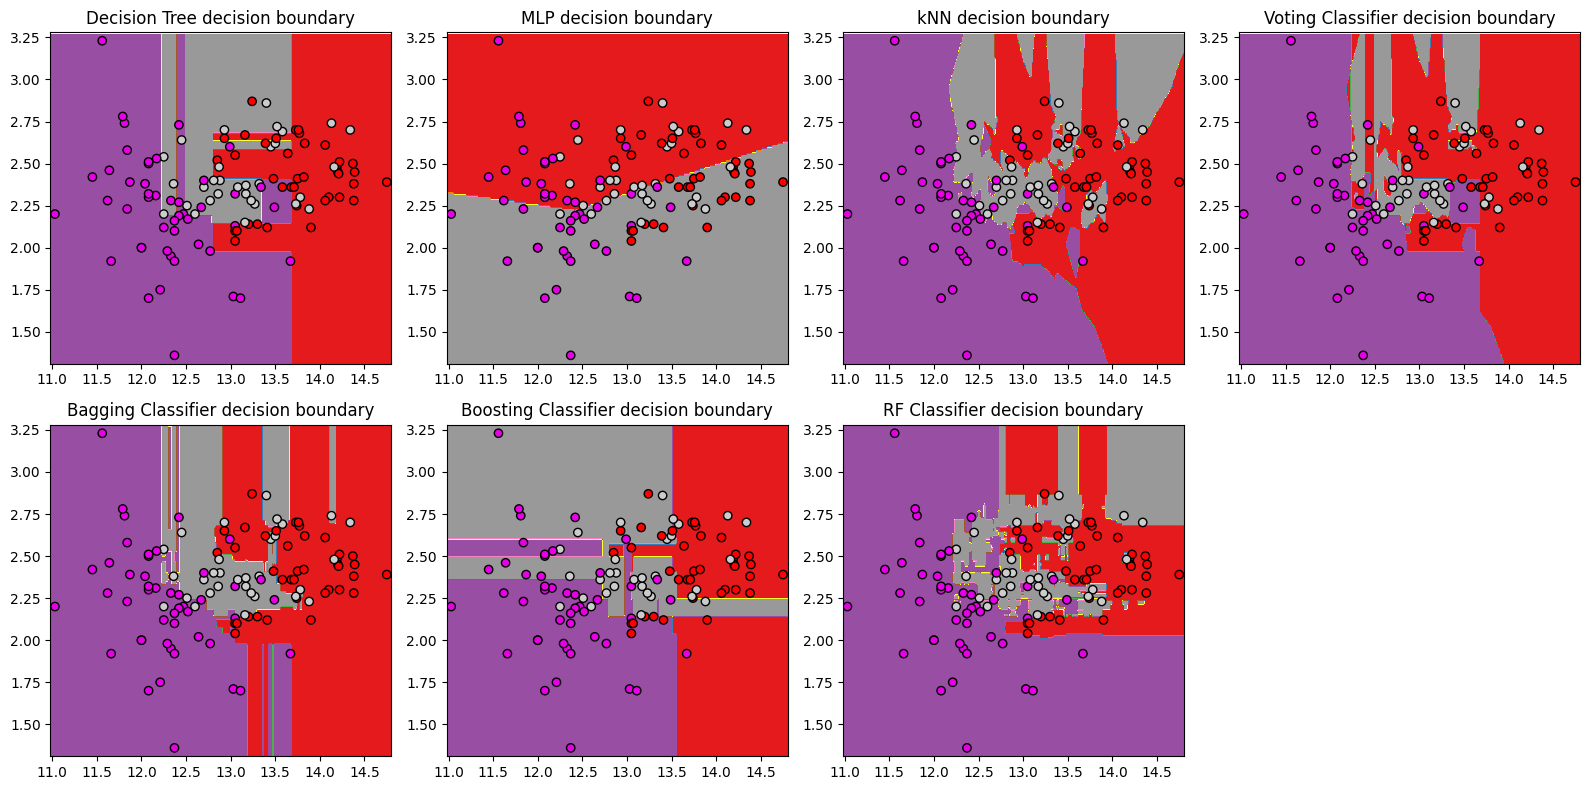

In [ ]:
# Plotar a superfície de decisão dos algoritmos no conjunto de treinamento
plt.figure(figsize=(16, 8))

# DT subplot
plt.subplot(2, 4, 1)
plot_decision_boundary(tree, x_train_values, y_train_values, 'Decision Tree decision boundary')

# MLP subplot
plt.subplot(2, 4, 2)
plot_decision_boundary(mlp, x_train_values, y_train_values, 'MLP decision boundary')

# kNN subplot
plt.subplot(2, 4, 3)
plot_decision_boundary(knn, x_train_values, y_train_values, 'kNN decision boundary')

# Voting subplot
plt.subplot(2, 4, 4)
plot_decision_boundary(voting_clf, x_train_values, y_train_values, 'Voting Classifier decision boundary')

# bagging subplot
plt.subplot(2, 4, 5)
plot_decision_boundary(bagging_clf, x_train_values, y_train_values, 'Bagging Classifier decision boundary')

# boosting subplot
plt.subplot(2, 4, 6)
plot_decision_boundary(boosting_clf, x_train_values, y_train_values, 'Boosting Classifier decision boundary')

# random forest subplot
plt.subplot(2, 4, 7)
plot_decision_boundary(random_forest_clf, x_train_values, y_train_values, 'RF Classifier decision boundary')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

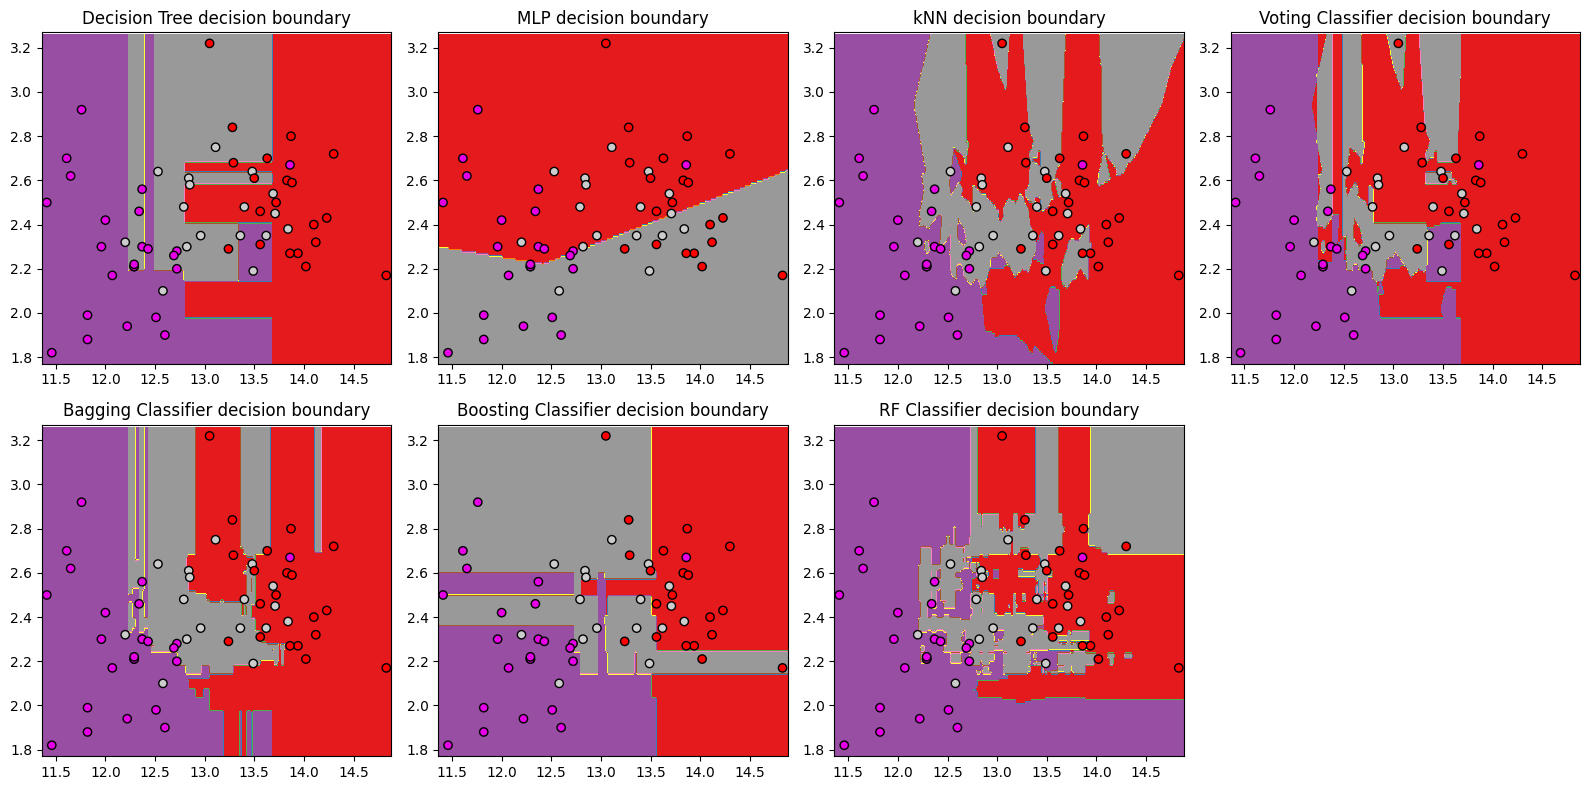

In [ ]:
# Plotar a superfície de decisão dos algoritmos no conjunto de teste
plt.figure(figsize=(16, 8))

y_test_values = y_test.values.ravel().astype(int)
x_test_values = X_test.values

# DT subplot
plt.subplot(2, 4, 1)
plot_decision_boundary(tree, x_test_values, y_test_values, 'Decision Tree decision boundary')

# MLP subplot
plt.subplot(2, 4, 2)
plot_decision_boundary(mlp, x_test_values, y_test_values, 'MLP decision boundary')

# kNN subplot
plt.subplot(2, 4, 3)
plot_decision_boundary(knn, x_test_values, y_test_values, 'kNN decision boundary')

# Voting subplot
plt.subplot(2, 4, 4)
plot_decision_boundary(voting_clf, x_test_values, y_test_values, 'Voting Classifier decision boundary')

# bagging subplot
plt.subplot(2, 4, 5)
plot_decision_boundary(bagging_clf, x_test_values, y_test_values, 'Bagging Classifier decision boundary')

# boosting subplot
plt.subplot(2, 4, 6)
plot_decision_boundary(boosting_clf, x_test_values, y_test_values, 'Boosting Classifier decision boundary')

# random forest subplot
plt.subplot(2, 4, 7)
plot_decision_boundary(random_forest_clf, x_test_values, y_test_values, 'RF Classifier decision boundary')

plt.tight_layout()
plt.show()

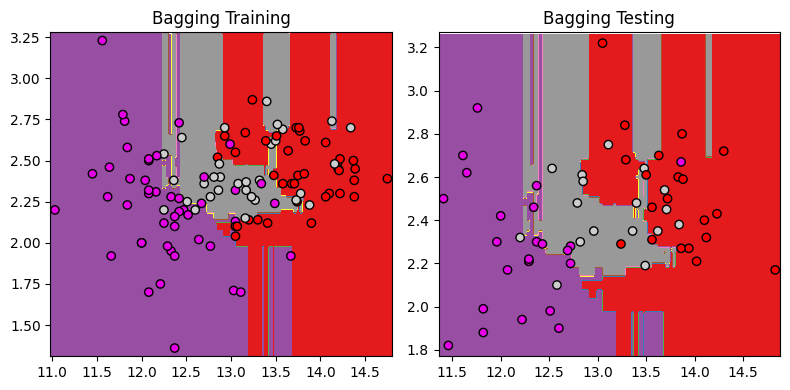

In [ ]:
# Plotar a superfície de decisão do Bagging (melhor algoritmo)
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_decision_boundary(bagging_clf, x_train_values, y_train_values, 'Bagging Training')

plt.subplot(1, 2, 2)
plot_decision_boundary(bagging_clf, x_test_values, y_test_values, 'Bagging Testing')

plt.tight_layout()
plt.show()